In [120]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

In [122]:
model = BertForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [124]:
tokenizer = BertTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

### Embeddings

In [127]:
# example question and text containing the answer
question = "How old is Montreal?"
answer_document = "Montreal is 383 years old as of 2025. It was founded on May 17, 1642, originally under the name Ville-Marie, as a French missionary settlement. Over the centuries, it grew into one of North America’s oldest and most historically significant major cities, with its early origins still evident in areas such as Old Montreal."

In [129]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)
print(encoding)

{'input_ids': [101, 2129, 2214, 2003, 5548, 1029, 102, 5548, 2003, 4229, 2509, 2086, 2214, 2004, 1997, 16798, 2629, 1012, 2009, 2001, 2631, 2006, 2089, 2459, 1010, 24061, 1010, 2761, 2104, 1996, 2171, 20184, 1011, 5032, 1010, 2004, 1037, 2413, 8696, 4093, 1012, 2058, 1996, 4693, 1010, 2009, 3473, 2046, 2028, 1997, 2167, 2637, 1521, 1055, 4587, 1998, 2087, 7145, 3278, 2350, 3655, 1010, 2007, 2049, 2220, 7321, 2145, 10358, 1999, 2752, 2107, 2004, 2214, 5548, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [131]:
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)
print ("Inputs:",inputs, "| Sentence_Embedding:",sentence_embedding, "| Tokens:",tokens)

Inputs: [101, 2129, 2214, 2003, 5548, 1029, 102, 5548, 2003, 4229, 2509, 2086, 2214, 2004, 1997, 16798, 2629, 1012, 2009, 2001, 2631, 2006, 2089, 2459, 1010, 24061, 1010, 2761, 2104, 1996, 2171, 20184, 1011, 5032, 1010, 2004, 1037, 2413, 8696, 4093, 1012, 2058, 1996, 4693, 1010, 2009, 3473, 2046, 2028, 1997, 2167, 2637, 1521, 1055, 4587, 1998, 2087, 7145, 3278, 2350, 3655, 1010, 2007, 2049, 2220, 7321, 2145, 10358, 1999, 2752, 2107, 2004, 2214, 5548, 1012, 102] | Sentence_Embedding: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] | Tokens: ['[CLS]', 'how', 'old', 'is', 'montreal', '?', '[SEP]', 'montreal', 'is', '38', '##3', 'years', 'old', 'as', 'of', '202', '##5', '.', 'it', 'was', 'founded', 'on', 'may', '17', ',', '1642', ',', 'originally', 'under', 'the', 'name', 'ville', '-', 'marie', ',', 'as', 'a', '

In [15]:
tokenizer.decode([101,102])

'[CLS] [SEP]'

In [17]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

### Model Output

In [19]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index)
print(end_index)

tensor(9)
tensor(12)


In [21]:
answer = ' '.join(tokens[start_index:end_index+1])
print(answer)

38 ##3 years old


In [23]:
import matplotlib as plt
import seaborn as sns

In [25]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [27]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

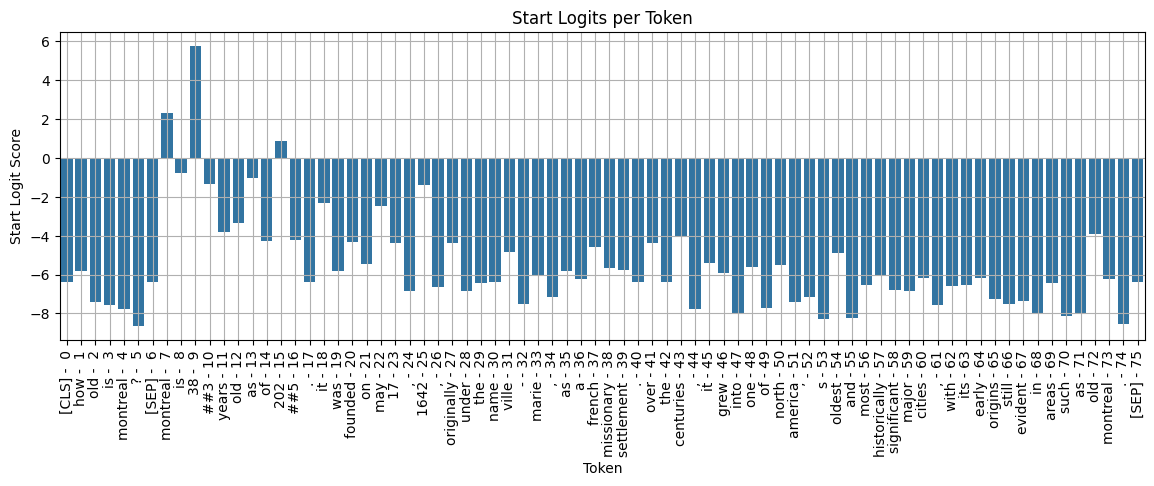

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 4))

ax = sns.barplot(x=token_labels, y=s_scores)

ax.tick_params(axis='x', rotation=90)
ax.set_title("Start Logits per Token")
ax.set_xlabel("Token")
ax.set_ylabel("Start Logit Score")
ax.grid(True)

plt.show()


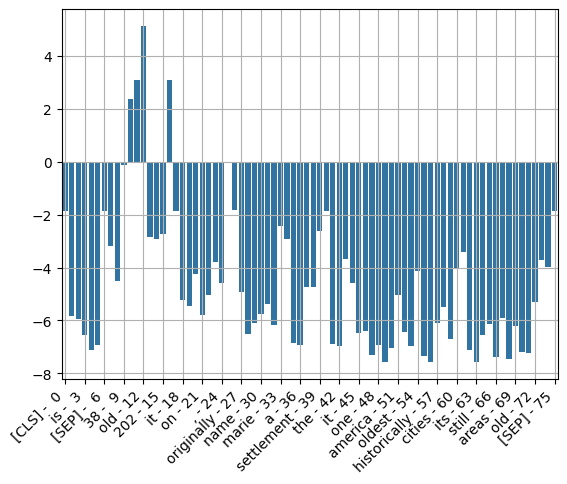

In [47]:
ax = sns.barplot(x=token_labels, y=e_scores)
N = 3
ax.set_xticks(range(0, len(token_labels), N))
ax.set_xticklabels(token_labels[::N], rotation=45, ha="right")

ax.grid(True)


### Question Answering Bot

In [60]:
sunset_motors_context = "Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar panels to power the facility, energy-efficient lighting, and a comprehensive recycling program. This commitment to eco-consciousness has earned Sunset Motors recognition as an industry leader in sustainable automotive retail. Sunset Motors proudly offers a diverse range of vehicles, including popular brands like Ford, Toyota, Honda, Chevrolet, and BMW, catering to a wide spectrum of tastes and preferences. In addition to its outstanding vehicle selection, Sunset Motors offers flexible financing options, allowing customers to secure affordable loans and leases with competitive interest rates."
print(sunset_motors_context)

Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar p

In [66]:
def faq_bot(question):

    context = sunset_motors_context
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx+1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    output = model(torch.tensor([input_ids]), token_type_ids = torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        print("I don't know how to answer this question, can you ask another one?")
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer

In [68]:
faq_bot("Where is the dealership located?")

' crestwood'

In [70]:
faq_bot("What is Sunset Motors?")

' a renowned automobile dealership'

In [72]:
faq_bot("what make of cars are available?")

' ford , toyota , honda , chevrolet , and bmw'

In [74]:
faq_bot("how large is the dealership?") 

' 10 acres'

### RoBERTa and DistilBERT

In [108]:
from transformers import RobertaTokenizer, RobertaModel
import torch

In [87]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

C:\Users\karan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [110]:
from transformers import  DistilBertTokenizer, DistilBertModel 
import torch

In [112]:
tokenizer =  DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\karan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]